# Lending_Club_CaseStudy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1)Understading Data

In [2]:
df = pd.read_csv('loan.csv')

In [3]:
df.shape

(39717, 111)

###it has 39717 rows and 111 columns

In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


<AxesSubplot:xlabel='loan_status', ylabel='count'>

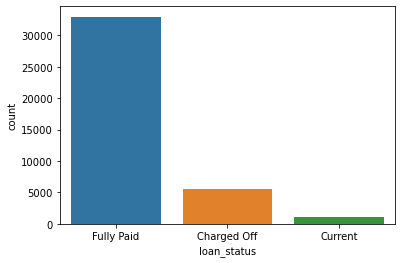

In [7]:
sns.countplot( x = df.loan_status, data = df)

#### objective is to find driving factors for loan defaulters, they are three types of columns, 1) loan details and attributes, 2) cutomer details 3) post loan customer attributes
#### --> we will be interested in analysing columns of customers details, loan details and attributes and remove columns with post loan attributes as this will not be know prior to approving loan
#### --> we will be interested in rows with loan status either fully_paid,Charged_off and ignore current for this analysis

## 2) Data cleaning and manipulation
## A) Fixing rows and columns

In [8]:
df.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

### we have few colums with all NA's , first lets identify and delete the columns

In [9]:
all_empty = df.columns[df.isna().sum() == 39717].to_list()
all_empty

['mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bal

### dropping columns having all null values

In [10]:
df1 = df.drop(columns = all_empty)

In [11]:
df1.shape

(39717, 57)

### dropping columns having same values in all rows

In [12]:
all_same = df1.columns[df1.nunique() == 1].to_list()
all_same

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [13]:
df2 = df1.drop(columns = all_same)

In [14]:
df2.shape

(39717, 48)

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

### emp_title, having mostly unique entries and can be ignored,desc can be ignored since we have more categorized form as 'purpose'

In [16]:
df2['emp_title'].nunique()

28820

In [17]:
df2['emp_title'].value_counts()

US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: emp_title, Length: 28820, dtype: int64

In [18]:
df2['desc'].nunique()

26527

### url is having common weblink + ID, ID & member_id is unique and can be igonred, zip code is not complete and cannot be imputed 

In [19]:
df3 = df2.drop(columns = ['url','emp_title','desc','id','member_id','zip_code'])

In [20]:
df3.shape

(39717, 42)

In [21]:
df3.isna().sum()

loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
purpose                        0
title                         11
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25682
mths_since_last_record     36931
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                    50
total_acc                      0
out_prncp                      0
out_prncp_inv                  0
total_pymn

### removing ['mths_since_last_delinq','mths_since_last_record','next_pymnt_d '] as these columns are mostly null

In [22]:
df4= df3.drop(columns = ['mths_since_last_delinq','mths_since_last_record','next_pymnt_d'])

In [23]:
df4.shape

(39717, 39)

###removing columns with post loan attributes

In [24]:
df5= df4.drop(columns = ['delinq_2yrs','earliest_cr_line','inq_last_6mths','revol_bal','revol_util','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d'])

In [25]:
df5.shape

(39717, 22)

### fixing rows: removing columns with loan_status = 'current'

In [26]:
df5 = df5[df5.loan_status != 'Current']

## 2B) Fixing missing values

In [27]:
df5.isna().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                     11
addr_state                 0
dti                        0
open_acc                   0
pub_rec                    0
total_acc                  0
pub_rec_bankruptcies     697
dtype: int64

In [28]:
df5.emp_length = df5.emp_length.fillna('< 1 year')

In [29]:
df5.title = df5.title.fillna('Other Loan')

In [30]:
df5.pub_rec_bankruptcies = df5.pub_rec_bankruptcies.fillna(0)

In [31]:
###rechecking for null vlaues
df5.isna().sum()

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
addr_state              0
dti                     0
open_acc                0
pub_rec                 0
total_acc               0
pub_rec_bankruptcies    0
dtype: int64

In [32]:
df5.shape

(38577, 22)

In [33]:
df5.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,issue_d,loan_status,purpose,title,addr_state,dti,open_acc,pub_rec,total_acc,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,Dec-11,Fully Paid,credit_card,Computer,AZ,27.65,3,0,9,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,Dec-11,Charged Off,car,bike,GA,1.00,3,0,4,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,Dec-11,Fully Paid,small_business,real estate business,IL,8.72,2,0,10,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,Dec-11,Fully Paid,other,personel,CA,20.00,10,0,37,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,...,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,9,0,12,0.0


## 2C) changing data types

In [34]:
df5.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
addr_state               object
dti                     float64
open_acc                  int64
pub_rec                   int64
total_acc                 int64
pub_rec_bankruptcies    float64
dtype: object

In [35]:
###Converting loam_amnt-Inv to int
df5.funded_amnt_inv = df5.funded_amnt_inv.astype("int32")

In [36]:
### loan term is either 36 months or 60 months converting it to 3 yrs and 5 yrs and as integer
df5.term = df5.term.apply(lambda x: x.replace('36 months','3'))
df5.term = df5.term.apply(lambda x: x.replace('60 months','5'))

In [37]:
df5.term = df5.term.astype("int32")
df5 = df5.rename(columns ={'term': 'term_yrs'})

In [38]:
###Converting interest rate to floating value
df5.int_rate = df5.int_rate.apply(lambda x: x.replace('%',''))
df5.int_rate = df5.int_rate.astype('float32')

In [39]:
###Converting annual income to int
df5.annual_inc = df5.annual_inc.astype("int32")

In [40]:
###Converting issue date to date format

df5['issue_month'] = df5.issue_d.str.split('-').str[0]
df5['issue_year'] = df5.issue_d.str.split('-').str[1]
###converting year 11 to 2011
df5['issue_year'] = '20'+df5.issue_year
df5['issue_year'] = df5.issue_year.astype('int32')

In [41]:
df5['issue_year']

0        2011
1        2011
2        2011
3        2011
5        2011
         ... 
39712    2007
39713    2007
39714    2007
39715    2007
39716    2007
Name: issue_year, Length: 38577, dtype: int32

In [42]:
df5.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term_yrs,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,purpose,title,addr_state,dti,open_acc,pub_rec,total_acc,pub_rec_bankruptcies,issue_month,issue_year
0,5000,5000,4975,3,10.65,162.87,B,B2,10+ years,RENT,...,credit_card,Computer,AZ,27.65,3,0,9,0.0,Dec,2011
1,2500,2500,2500,5,15.27,59.83,C,C4,< 1 year,RENT,...,car,bike,GA,1.00,3,0,4,0.0,Dec,2011
2,2400,2400,2400,3,15.96,84.33,C,C5,10+ years,RENT,...,small_business,real estate business,IL,8.72,2,0,10,0.0,Dec,2011
3,10000,10000,10000,3,13.49,339.31,C,C1,10+ years,RENT,...,other,personel,CA,20.00,10,0,37,0.0,Dec,2011
5,5000,5000,5000,3,7.90,156.46,A,A4,3 years,RENT,...,wedding,My wedding loan I promise to pay back,AZ,11.20,9,0,12,0.0,Dec,2011


In [43]:
###renaming final data set as 'loan'
loan = df5

## 3)Data analysis

## A)Uni variate analysis & Segmented UniVariate

<AxesSubplot:xlabel='annual_inc'>

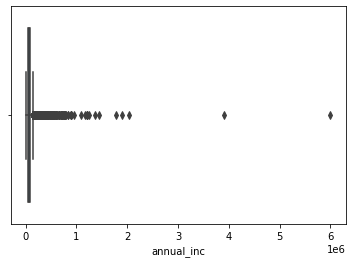

In [44]:
sns.boxplot(data = loan, x = 'annual_inc')

### annual income seems to be more skewed we can remove outliers removing 0.95 percentile rows for analysis

In [45]:
np.quantile(loan.annual_inc,0.95)

140004.0

In [46]:
loan = loan[(loan['annual_inc']<= 140004)]

<AxesSubplot:xlabel='annual_inc'>

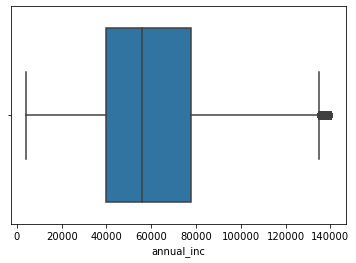

In [47]:
sns.boxplot(data = loan, x = 'annual_inc')

<AxesSubplot:xlabel='loan_amnt'>

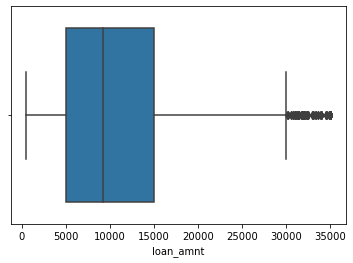

In [48]:
sns.boxplot(data = loan, x = 'loan_amnt')

<AxesSubplot:xlabel='int_rate'>

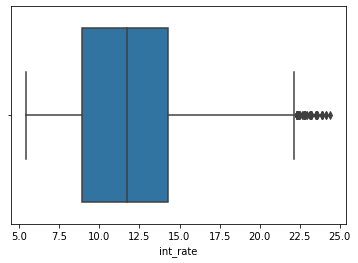

In [49]:
sns.boxplot(data = loan, x = 'int_rate')

<AxesSubplot:xlabel='loan_status', ylabel='count'>

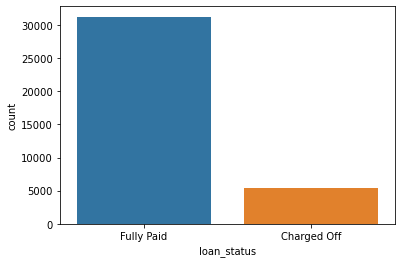

In [50]:
sns.countplot(data = loan, x = 'loan_status')

<AxesSubplot:xlabel='grade', ylabel='count'>

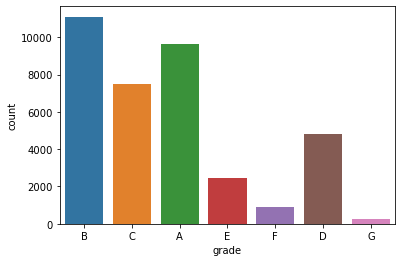

In [51]:
sns.countplot(data = loan, x = 'grade')


<AxesSubplot:xlabel='sub_grade', ylabel='count'>

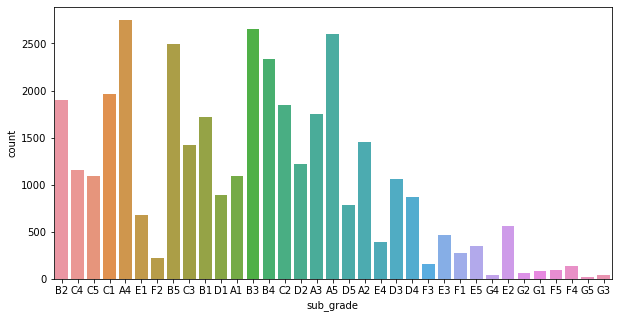

In [52]:
plt.figure(figsize=(10,5))
sns.countplot(data = loan, x = 'sub_grade')

In [53]:
loan.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv           int32
term_yrs                  int32
int_rate                float32
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc                int32
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
addr_state               object
dti                     float64
open_acc                  int64
pub_rec                   int64
total_acc                 int64
pub_rec_bankruptcies    float64
issue_month              object
issue_year                int32
dtype: object

<AxesSubplot:xlabel='term_yrs', ylabel='count'>

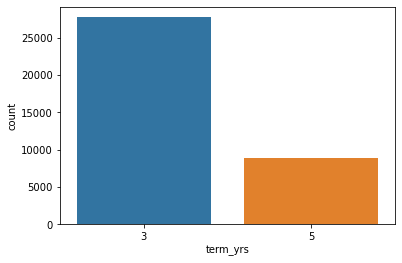

In [54]:
sns.countplot(data = loan, x = 'term_yrs')

<AxesSubplot:xlabel='emp_length', ylabel='count'>

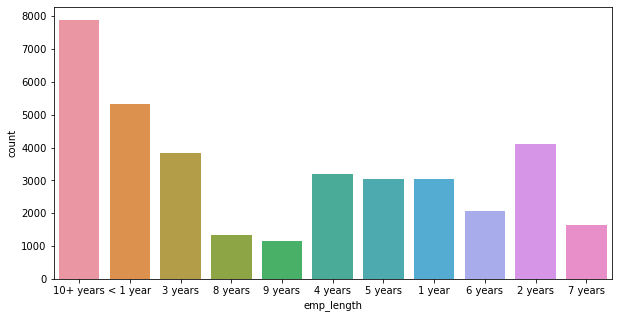

In [55]:
plt.figure(figsize=(10,5))
sns.countplot(data = loan, x = 'emp_length')

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

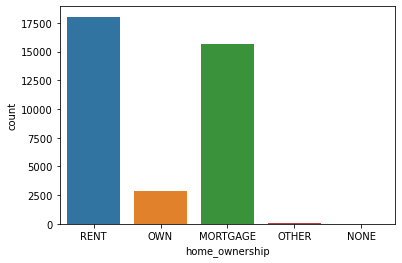

In [56]:
sns.countplot(data = loan, x = 'home_ownership')

<AxesSubplot:xlabel='issue_month', ylabel='count'>

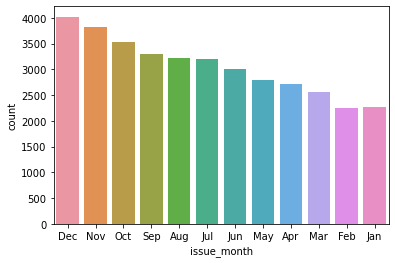

In [57]:
sns.countplot(data = loan, x = 'issue_month')

<AxesSubplot:xlabel='issue_year', ylabel='count'>

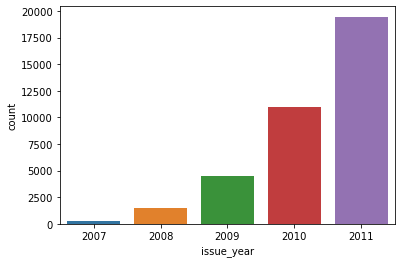

In [58]:
sns.countplot(data = loan, x = 'issue_year')

<AxesSubplot:xlabel='verification_status', ylabel='count'>

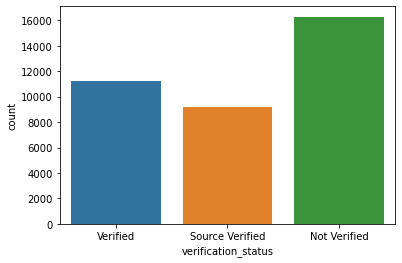

In [59]:
sns.countplot(data = loan, x = 'verification_status')

<AxesSubplot:xlabel='purpose', ylabel='count'>

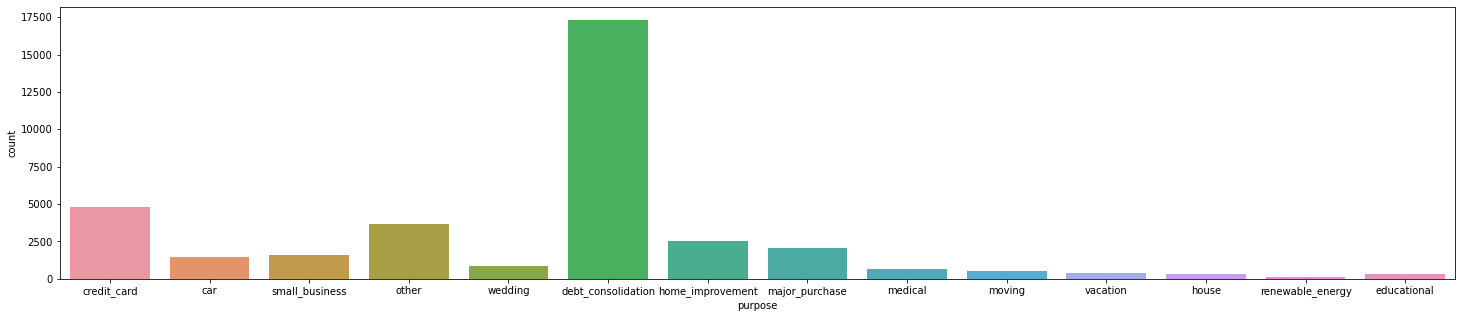

In [60]:
plt.figure(figsize=(25,5))
sns.countplot(data = loan, x = 'purpose')

#### conclusions from data:
#### Average loan amount is close to 9000, average interest rate is 12%, loan term is 3 years
#### ~5000 of 32000 have defaulted laon i.e 15%
#### generally category B and A have taken loan mostly
#### persons with < 1 year or 10+ years experience have taken laon
#### approved loans increased with year 2011 and with month also with dec having most loans approved
#### people have taken loans for debt consolidation the most

## now lets analyize data for loan default segment of data (segmented Univariate)

In [61]:
loan.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term_yrs,int_rate,installment,annual_inc,dti,open_acc,pub_rec,total_acc,pub_rec_bankruptcies,issue_year
count,36654.000000,36654.000000,36654.000000,36654.000000,36654.000000,36654.000000,36654.000000,36654.000000,36654.000000,36654.000000,36654.000000,36654.000000,36654.000000
mean,10682.249550,10436.144077,9894.094396,3.487423,11.888005,311.888682,60855.744994,13.446725,9.167294,0.056829,21.641349,0.043897,2010.308343
std,7048.414166,6800.636737,6730.736056,0.858653,3.667254,199.230096,27750.285238,6.661899,4.353165,0.240307,11.232836,0.205533,0.881224
min,500.000000,500.000000,0.000000,3.000000,5.420000,15.690000,4000.000000,0.000000,2.000000,0.000000,2.000000,0.000000,2007.000000
25%,5000.000000,5000.000000,4975.000000,3.000000,8.940000,163.080000,40000.000000,8.350000,6.000000,0.000000,13.000000,0.000000,2010.000000
50%,9250.000000,9000.000000,8375.000000,3.000000,11.710000,270.420000,56000.000000,13.580000,8.000000,0.000000,20.000000,0.000000,2011.000000
75%,15000.000000,14400.000000,13623.500000,3.000000,14.270000,408.480000,77970.500000,18.710000,12.000000,0.000000,28.000000,0.000000,2011.000000
max,35000.000000,35000.000000,35000.000000,5.000000,24.400000,1305.190000,140004.000000,29.990000,44.000000,4.000000,90.000000,2.000000,2011.000000


In [62]:
### converting numeric data into bins
loan['loan_status_group'] = loan['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)
loan['loan_amnt_group'] = pd.cut(x = loan['loan_amnt'],bins = [0,7000,14000,21000,28000,35001])
loan['int_rate_group'] = pd.cut(x = loan['int_rate'],bins = [5,10,15,20,25])
loan['dti_group'] = pd.cut(x = loan['dti'],bins = [0,6,12,18,24,30])
loan['annual_inc_group'] = pd.cut(x = loan['annual_inc'],bins = [0,30000,60000,90000,120000,150000],labels=['VLow','Low','Med','High',"VHigh"])
loan['total_acc_group'] = pd.cut(x = loan['int_rate'],bins = [0,25,50,75,100])
loan['open_acc_group'] = pd.cut(x = loan['int_rate'],bins = [0,10,20,30,45])


In [63]:
def uniplot(x):
    fig, ax = plt.subplots(1,2, figsize=(15,5))
    sns.barplot(ax=ax[0],data = loan,x = x, y=loan['loan_status_group'],hue = 'loan_status',ci=None,estimator = lambda x:len(x))
    plt.ylabel('number defaulted_loans')
    ax[0].set_title('Count of fully paid & Defaulted loans')
    sns.barplot(ax=ax[1],data = loan,x = x, y=loan['loan_status_group'],ci=None,estimator = lambda x:np.mean(x)*100)
    plt.ylabel('% of defaulted_loans')
    ax[1].set_title('%  of defaulted_loans')
    plt.show()


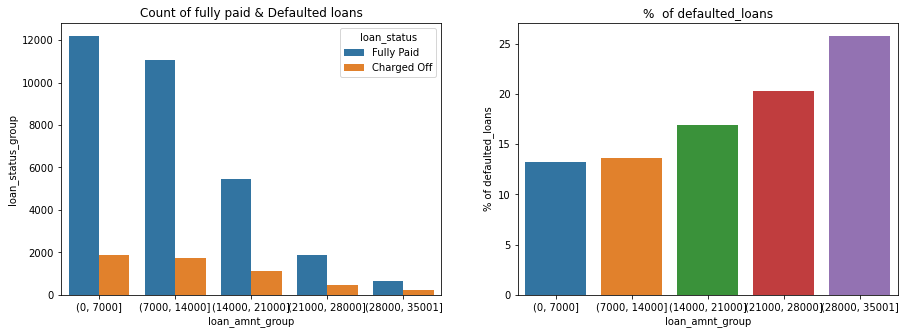

In [64]:
uniplot(x = loan['loan_amnt_group'])

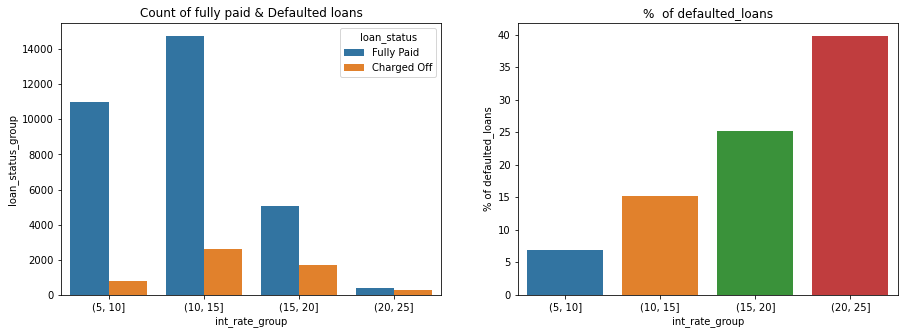

In [65]:
uniplot(x = loan['int_rate_group'])

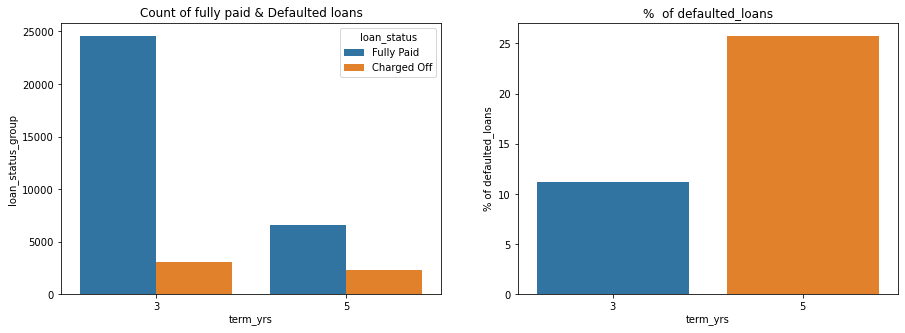

In [66]:
uniplot(x = loan['term_yrs'])

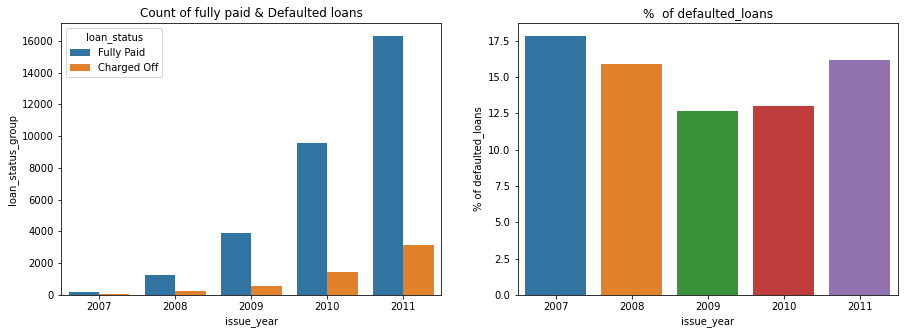

In [67]:
uniplot(x = loan['issue_year'])

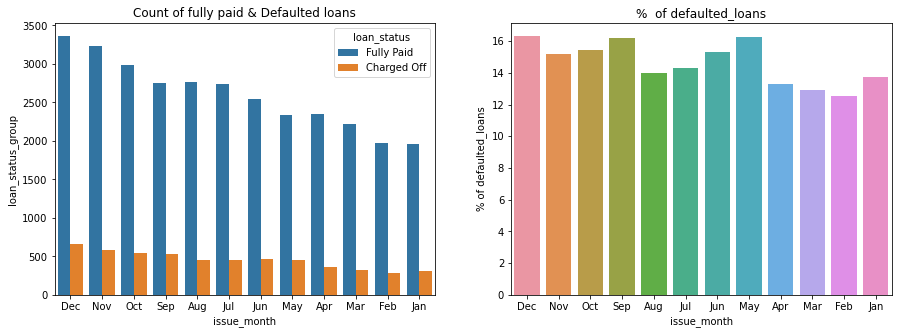

In [68]:
uniplot(x = loan['issue_month'])

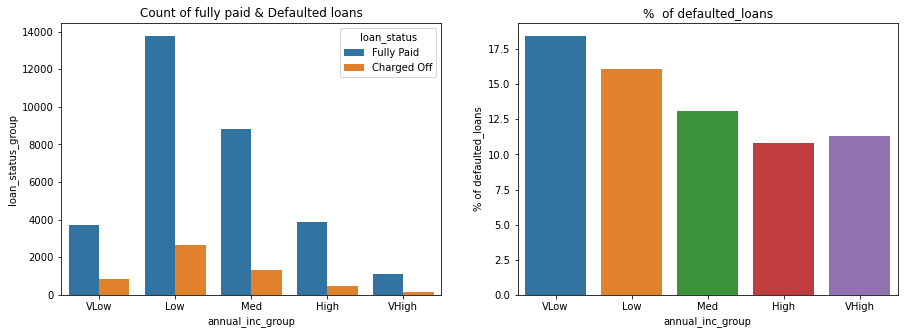

In [69]:
uniplot(x = loan['annual_inc_group'])

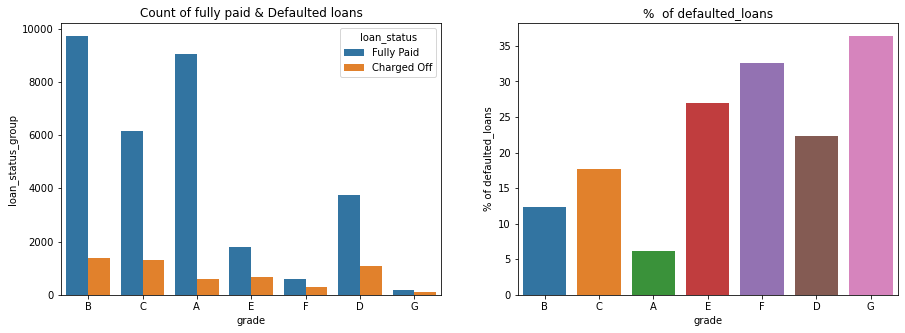

In [70]:
uniplot(x = loan['grade'])

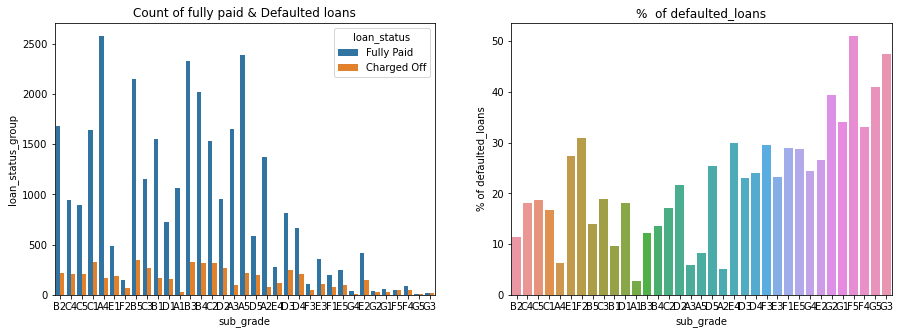

In [71]:
uniplot(x = loan['sub_grade'])

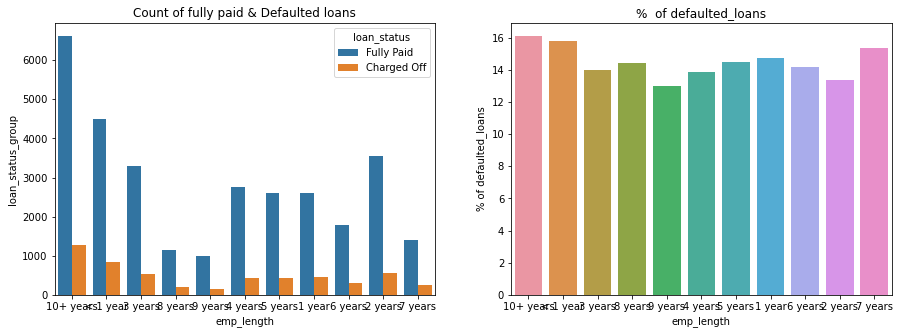

In [72]:
uniplot(x = loan['emp_length'])

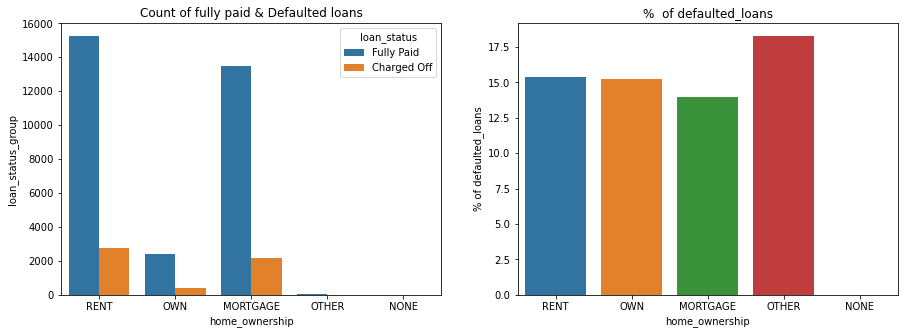

In [73]:
uniplot(x = loan['home_ownership'])

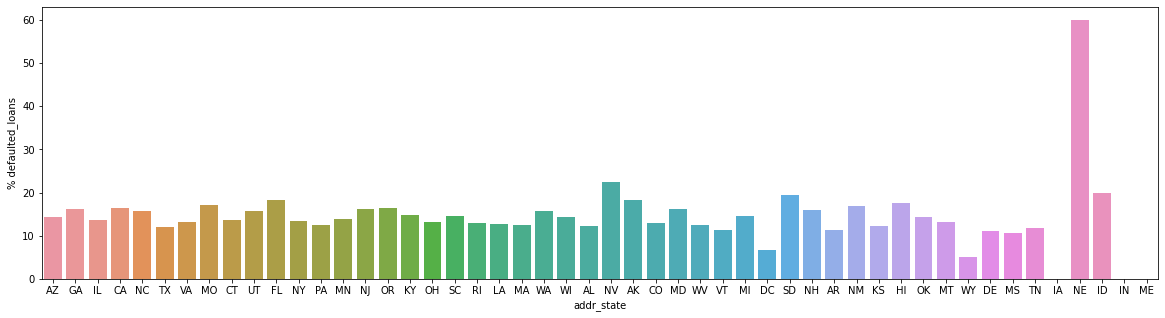

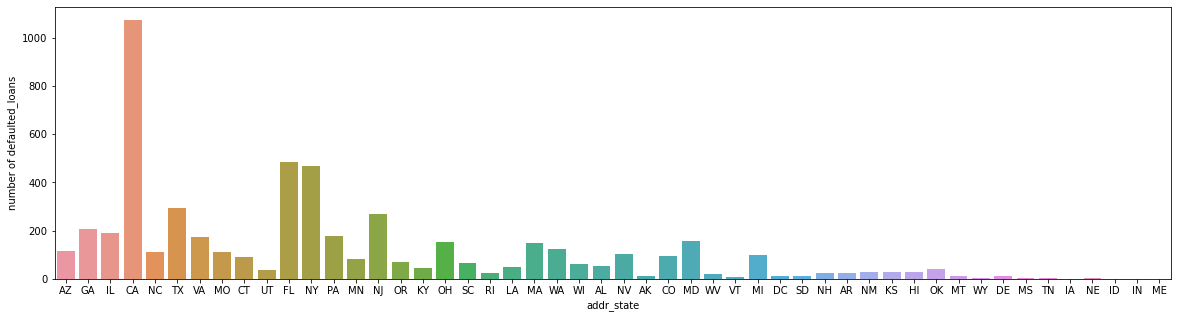

In [74]:
plt.figure(figsize=(20,5))
sns.barplot(data=loan,x=loan['addr_state'],y=loan['loan_status_group'],ci=None,estimator = lambda x:np.mean(x)*100)
plt.ylabel('% defaulted_loans')
plt.show()
plt.figure(figsize=(20,5))
sns.barplot(data=loan,x=loan['addr_state'],y=loan['loan_status_group'],ci=None,estimator = lambda x:np.sum(x))
plt.ylabel('number of defaulted_loans')
plt.show()


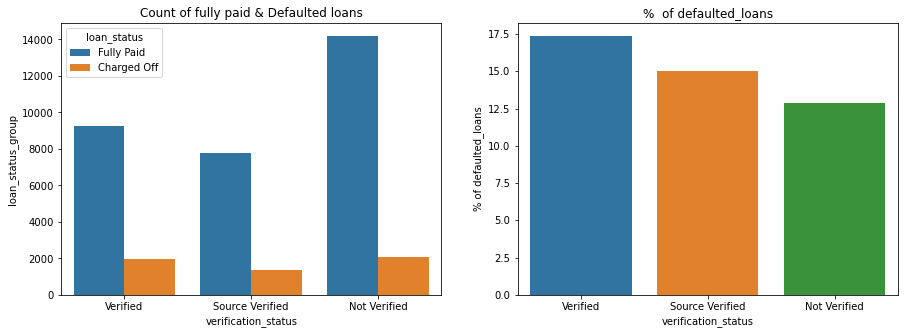

In [75]:
uniplot(x = loan['verification_status'])

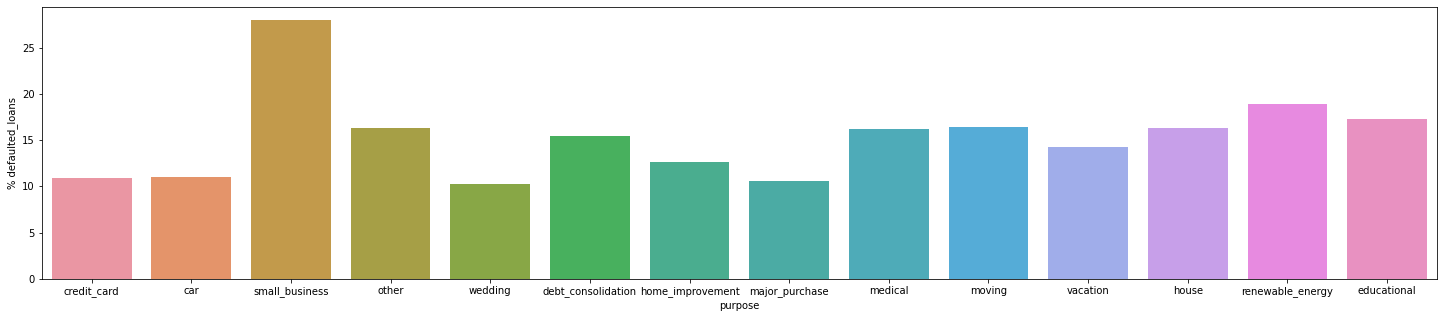

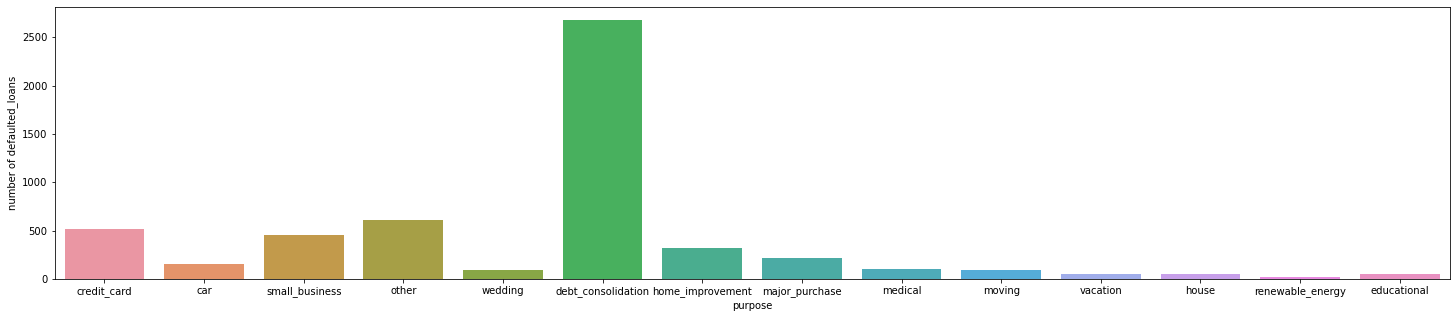

In [76]:
plt.figure(figsize=(25,5))
sns.barplot(data=loan,x=loan['purpose'],y=loan['loan_status_group'],ci=None,estimator = lambda x:np.mean(x)*100)
plt.ylabel('% defaulted_loans')
plt.show()
plt.figure(figsize=(25,5))
sns.barplot(data=loan,x=loan['purpose'],y=loan['loan_status_group'],ci=None,estimator = lambda x:np.sum(x))
plt.ylabel('number of defaulted_loans')
plt.show()


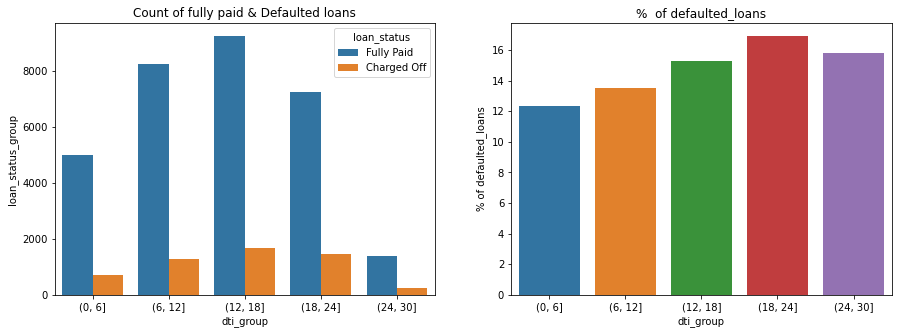

In [77]:
uniplot(x = loan['dti_group'])

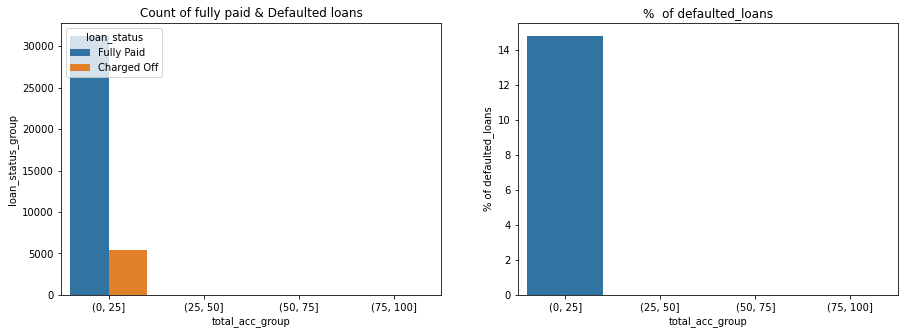

In [78]:
uniplot(x = loan['total_acc_group'])

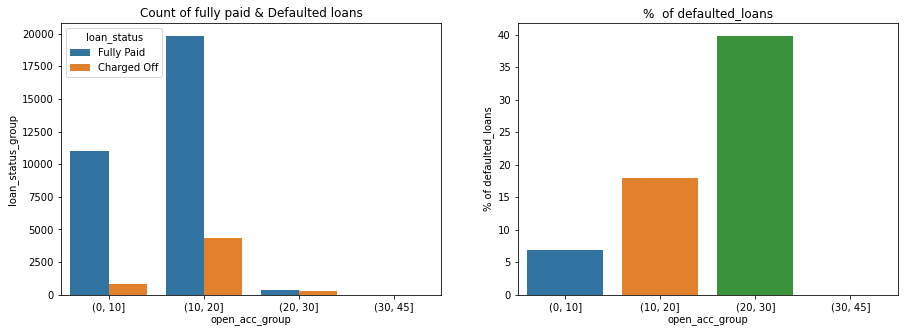

In [79]:
uniplot(x = loan['open_acc_group'])

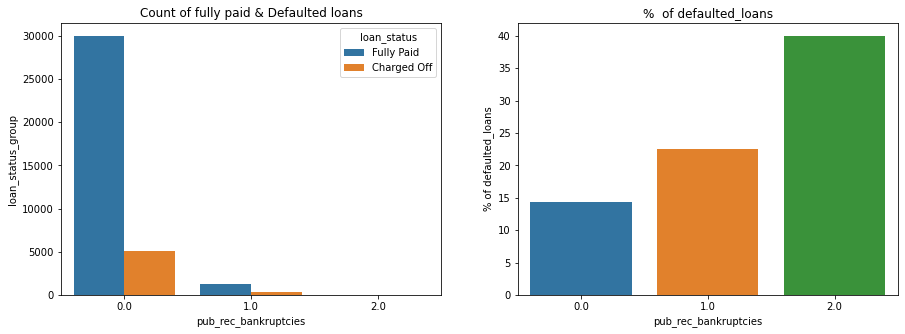

In [80]:
uniplot(x = loan['pub_rec_bankruptcies'])

### Observations/Conclusions from data for understanding Loan defaulting %:
### Loan Attributes
#### 1.) higher the loan amount higher chance of defaulting
#### 2.) higher the interest higher chance of defaulting
#### 3.) longer the tenure of loan higher chance of defaulting
#### 4.) as loan grade decreased from A to F defaulting increase
#### 5.) defaulting wa low in 2008-2009-2010 might be due to effect of recession in 2008-09 where bank was more careful
#### 6.) generally defaulting is higher in month of Dec, loans approved for that year

### Person Attributes
#### 1.) person with low annual income are likely to default
#### 2.) person with small business genrally tend to default hgiher when compared to other categories may be due to risk in bussinnes
#### 3.) person address doenst matter most of times expect for state NE can be ignored as no of loans are very low for that state and is outlier
#### 4.) persons with more no of open accounts tends to default higher except last bin where
#### 5.) person with record of bankrupties tend to defalut loan except in last bin where records are very few and may be outlier
#### 6.) generally as 'dti' increases defaulting increased except last bin

### Most important parameters for defaulting
#### Loan amount,Higher Interest rate, longer tuenure, Annual Income, Loan Grade, Reason, dti , open accounts & record of bankrupties


## B) Derived metrics

#### Creating Loan amount and income are most important creating derived metrics Loan to Income ratio (LTI), it will tell a person has taken loan amount more than his capacity or not, thus may indicate defaulting

In [81]:
loan['LTI'] = loan['loan_amnt']/loan['annual_inc']
loan['LTI_group'] = pd.cut(loan['LTI'], bins = [0,0.10,0.25,0.50,0.85])
loan['LTI'].describe()

count    36654.000000
mean         0.190567
std          0.115638
min          0.007375
25%          0.100553
50%          0.166667
75%          0.255697
max          0.830000
Name: LTI, dtype: float64

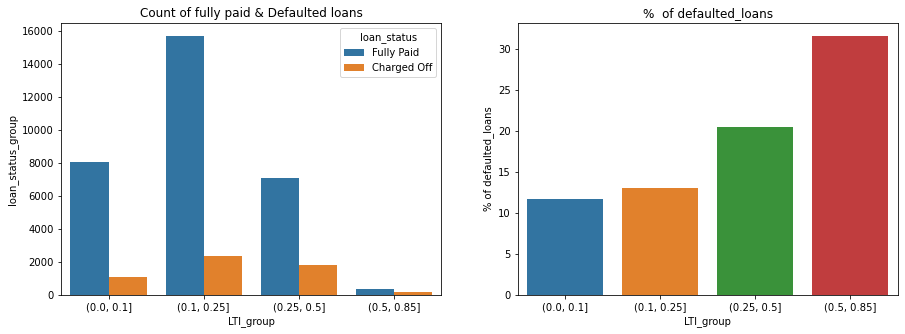

In [82]:
uniplot(x = loan['LTI_group'])

### Derived metrics LTI(loan amount to income ratio) seems to be important parameter apart from DTI provide and we see as LTI increased defaulting is more

## C) bi-variate analysis

In [83]:
topvar = loan[['loan_amnt','term_yrs','int_rate','annual_inc','dti','grade','LTI','pub_rec_bankruptcies','purpose']]
corr = topvar.corr()

<AxesSubplot:>

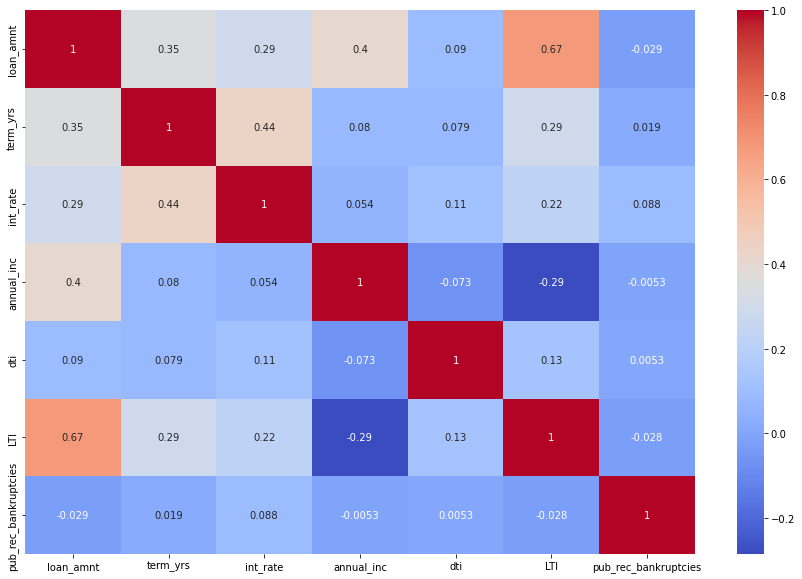

In [84]:
plt.figure(figsize=(15,10))
sns.heatmap(corr,data = topvar,annot = True,cmap= 'coolwarm')

In [85]:
def bivar_hmap(*,data=loan,x,y, figsize=(7,5)):
    fig, ax = plt.subplots(figsize=figsize)
    pivtab = pd.pivot_table(data = data,values = 'loan_status_group', index = y, columns = x)
    sns.heatmap(pivtab,annot = True,cmap= 'coolwarm')
    plt.show()

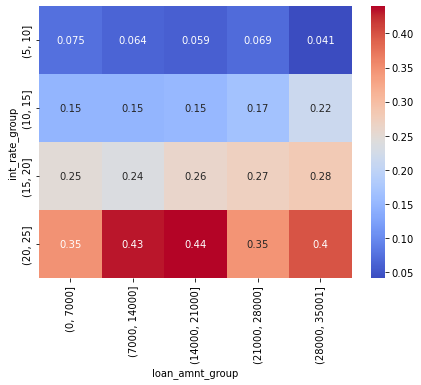

In [86]:
bivar_hmap(x = 'loan_amnt_group',y = 'int_rate_group')

#### persons with higher interest rate tend to default higher although amount is lower also

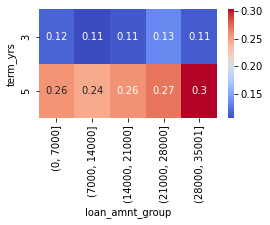

In [87]:
bivar_hmap(x = 'loan_amnt_group',y = 'term_yrs',figsize=(4,2))

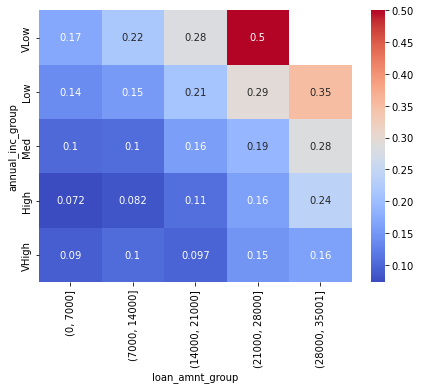

In [88]:
bivar_hmap(x = 'loan_amnt_group',y = 'annual_inc_group')

#### loan amount and annual income tend to have combined imapct

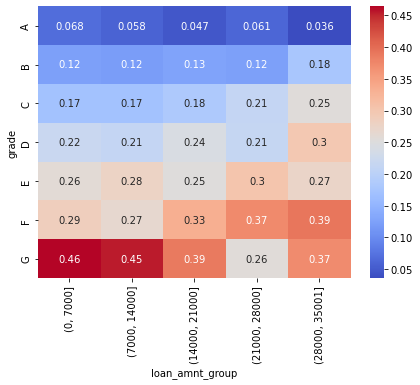

In [89]:
bivar_hmap(x = 'loan_amnt_group',y = 'grade')

#### grade G and loan amount lower tend to default more

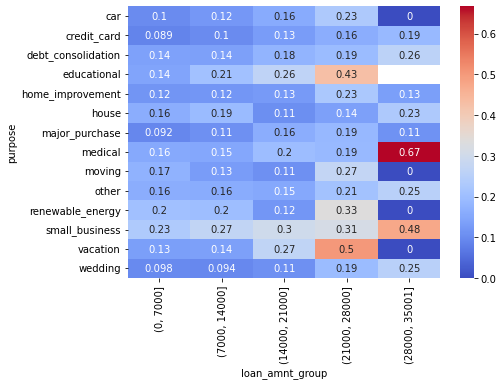

In [90]:
bivar_hmap(x = 'loan_amnt_group',y = 'purpose')

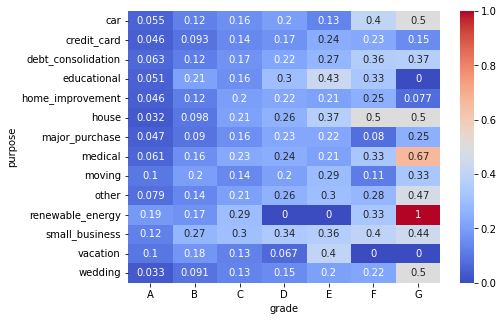

In [91]:
bivar_hmap(x = 'grade',y = 'purpose')

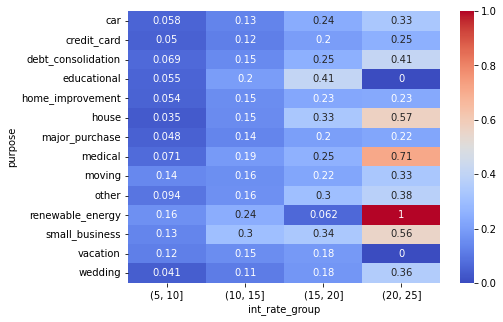

In [92]:
bivar_hmap(x = 'int_rate_group',y = 'purpose')

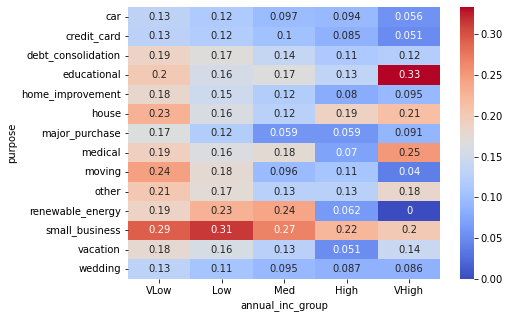

In [93]:
bivar_hmap(x = 'annual_inc_group',y = 'purpose')

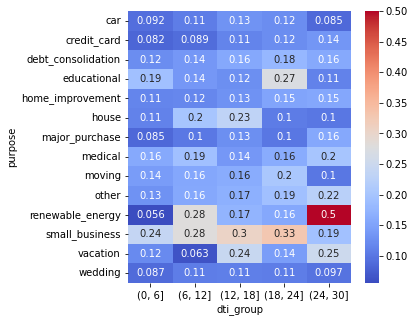

In [94]:
bivar_hmap(x = 'dti_group',y = 'purpose', figsize=(5,5))

#### person who take loan for (medical,small_business, vacation, educational,renewable ) purpose and higher amount tend to default higher
#### person with grade G and medical or renewable as purpose mostly default
#### person with smal business as purpose default irrespective of annual Income

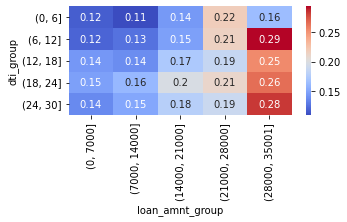

In [95]:
bivar_hmap(x = 'loan_amnt_group',y = 'dti_group',figsize=(5,2))


# Summary
## Loan attributes leading to defaulting :
### Higher the interest higher the chance of defaulting
### Higher the loan amount chance of defaulting is higher
### Longer the tenure of loan higher chance of defaulting
### Lower the loan grade ( Assuming G is lower compared to A), defaulting increased

## Applicant attributes leading to defaulting :
### Lower the annual income of applicant higher the chance of defaulting
### Applicant with reasons as ‘small business’ or ‘renewable energy’ tend to default loan
### Applicant with higher ‘dti’ tend to default loan
### If applicant having record of bankruptcies will most likely default loan 

## Combined impact attributes
### Loan amount and annual income tend to have combined impact
### Loan grade G and loan amount lower tend to default more
### Applicant who take loan for (medical, small business, vacation, educational, renewable ) purpose and higher amount tend to default higher
### Applicant with grade G and medical or renewable as purpose mostly default loan
### Applicant with small business as purpose default irrespective of annual Income


